<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/LoL_Match_History_%26_Summoner_Data_%E2%80%93_78k_Matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[LoL Match History & Summoner Data – 78k Matches](https://www.kaggle.com/datasets/nathansmallcalder/lol-match-history-and-summoner-data-80k-matches?resource=download&select=TeamMatchTbl.csv)


10/10/2025

Nathan Smallcalder. (2025). LoL Match History & Summoner Data – 78k Matches [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/13444983

About Dataset
League of Legends Relational Database for Match Prediction
Context
This dataset contains detailed match and player data from League of Legends, one of the most popular multiplayer online battle arena (MOBA) games in the world. It includes 35,000 matches and contains 78,000 summoner statistics, capturing a wide range of in-game statistics, such as champion selection, player performance metrics, match outcomes, and more.

The dataset is structured to support a variety of analyses, including:

Predicting match outcomes based on team compositions and player stats
Evaluating player performance and progression over time
Exploring trends in champion popularity and win rates
Building machine learning models for esports analytics
Whether you are interested in competitive gaming, data science, or predictive modeling, this dataset provides a rich source of structured data to explore the dynamics of League of Legends at scale.

Data Schema and Dictionary

Data was collected from Riot Games API using Python script(link) from Patch 25.19

The datase consists of 7 csv files:

MatchStatsTbl - Match Stats given a summonerID and MatchID.Contains K/D/A, Items, Runes,Ward Score, Summoner Spells, Baron Kills, Dragon Kills, Lane, DmgTaken/Dealt, Total Gold, cs,Mastery Points and Win/Loss

TeamMatchStatsTbl - Containes Red/Blue Champions,Red/Blue BaronKills,Blue/Red Turret Kills, Red/Blue Kills, RiftHearaldKills and Win/loss

MatchTbl- Contains MatchID,Rank,Match Duration and MatchType.

RankTbl - Contains RankID and RankName

ChampionTbl- Contains ChampionID and ChampionName

ItemTbl - Contains ItemID and ItemName

SummonerTbl - Contains SummonerID and SummonerName

SummonerMatchTbl - Links MatchID,SummonerID and ChampionID

Database Features

This dataset contains 35,422 League of Legends matches and 78,863 summoner statistics from those games.

Uses Data from over 2,381 summoners.

Consists of data only from Europe West(EUW)
Data is sampled from Unranked to Challenger tiers.

Database Setup

-MySQL Database using Linux

-Database Schema Script can be found here. (Works with the gtihub project to collect your own data)

Limitations

The Riot API only provides the "BOTTOM" lane for bot-lane players.
During Data collection, roles were inferred by combining chapions that often played support with CS metrics to distinguish ADC vs Support — especially for ambiguous picks like Senna or off-meta choices.

Acknowledgements/Privacy

Data is collected using the official Riot Games API. We thank Riot Games for providing the data and tools that make this project possible. This dataset is not endorsed or certified by Riot Games.
No personal or identifiable player data (e.g., Summoner Names, Summoner IDs, or PUUIDs) are included.
The SummonerTbl has been intentionally excluded from this public release.

Github

The Python scripts used for data collection, as well as various scripts I developed for API calls, database management, and initial data analytics, can be found on [GitHub](https://github.com/NathanSmallcalder/LeagueDatabaseandStatsCollector/tree/main)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Scikit-learn for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Set plot aesthetics
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Load the data

In [3]:
matchstats_df = pd.read_csv('https://github.com/vn322/Sport-University/raw/refs/heads/main/esport/MatchStatsTbl.csv', encoding='ascii')
matchstats_df.head(3)

,MatchStatsId,SummonerMatchFk,MinionsKilled,DmgDealt,DmgTaken,TurretDmgDealt,TotalGold,Lane,Win,item1,...,PrimarySlot3,SecondarySlot1,SecondarySlot2,SummonerSpell1,SummonerSpell2,CurrentMasteryPoints,EnemyChampionFk,DragonKills,BaronKills,visionScore
0,1,1,30,4765,12541,0,7058,BOTTOM,0,3870,...,8453,8345,8347,4,7,902,51,0,0,67
1,2,2,29,8821,14534,1,9618,BOTTOM,0,3870,...,8453,8345,8347,4,7,902,236,0,0,88
2,3,3,34,6410,19011,3,9877,BOTTOM,1,3870,...,8237,8345,8347,4,7,16,498,0,0,97


In [4]:
matchstats_df.columns

Index(['MatchStatsId', 'SummonerMatchFk', 'MinionsKilled', 'DmgDealt',
       'DmgTaken', 'TurretDmgDealt', 'TotalGold', 'Lane', 'Win', 'item1',
       'item2', 'item3', 'item4', 'item5', 'item6', 'kills', 'deaths',
       'assists', 'PrimaryKeyStone', 'PrimarySlot1', 'PrimarySlot2',
       'PrimarySlot3', 'SecondarySlot1', 'SecondarySlot2', 'SummonerSpell1',
       'SummonerSpell2', 'CurrentMasteryPoints', 'EnemyChampionFk',
       'DragonKills', 'BaronKills', 'visionScore'],
      dtype='object')

In [5]:
teammatch_df = pd.read_csv('https://github.com/vn322/Sport-University/raw/refs/heads/main/esport/TeamMatchTbl.csv', encoding='ascii')
teammatch_df.head(3)

,TeamID,MatchFk,B1Champ,B2Champ,B3Champ,B4Champ,B5Champ,R1Champ,R2Champ,R3Champ,...,BlueDragonKills,BlueTowerKills,BlueKills,RedBaronKills,RedRiftHeraldKills,RedDragonKills,RedTowerKills,RedKills,RedWin,BlueWin
0,1,EUW1_7565751492,897,154,157,51,902,164,5,25,...,1,3,13,1,0,3,8,26,1,0
1,2,EUW1_7565549583,82,238,157,236,89,6,254,127,...,3,10,39,0,1,1,3,33,0,1
2,3,EUW1_7564803077,516,28,4,498,235,23,64,38,...,2,7,27,2,0,3,8,37,1,0


In [6]:
teammatch_df.columns

Index(['TeamID', 'MatchFk', 'B1Champ', 'B2Champ', 'B3Champ', 'B4Champ',
       'B5Champ', 'R1Champ', 'R2Champ', 'R3Champ', 'R4Champ', 'R5Champ',
       'BlueBaronKills', 'BlueRiftHeraldKills', 'BlueDragonKills',
       'BlueTowerKills', 'BlueKills', 'RedBaronKills', 'RedRiftHeraldKills',
       'RedDragonKills', 'RedTowerKills', 'RedKills', 'RedWin', 'BlueWin'],
      dtype='object')

# Exploratory Data Analysis

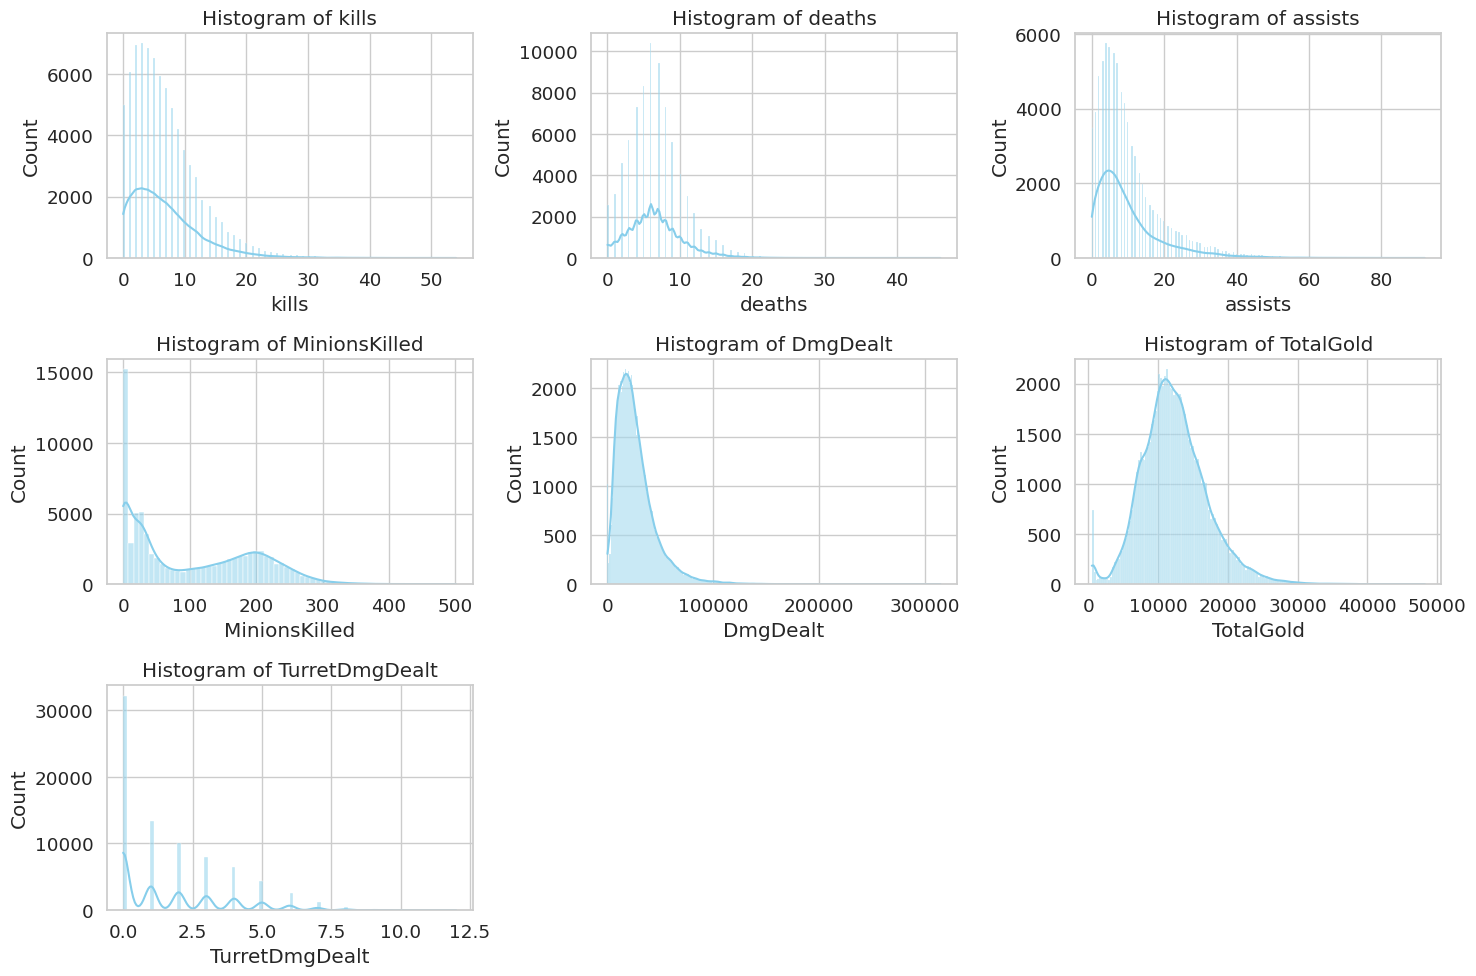

/tmp/ipython-input-3872657022.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Lane', data=matchstats_df, palette='pastel')


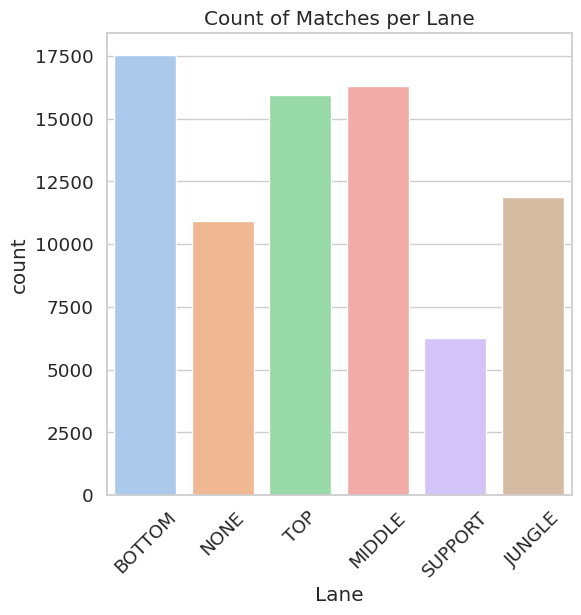

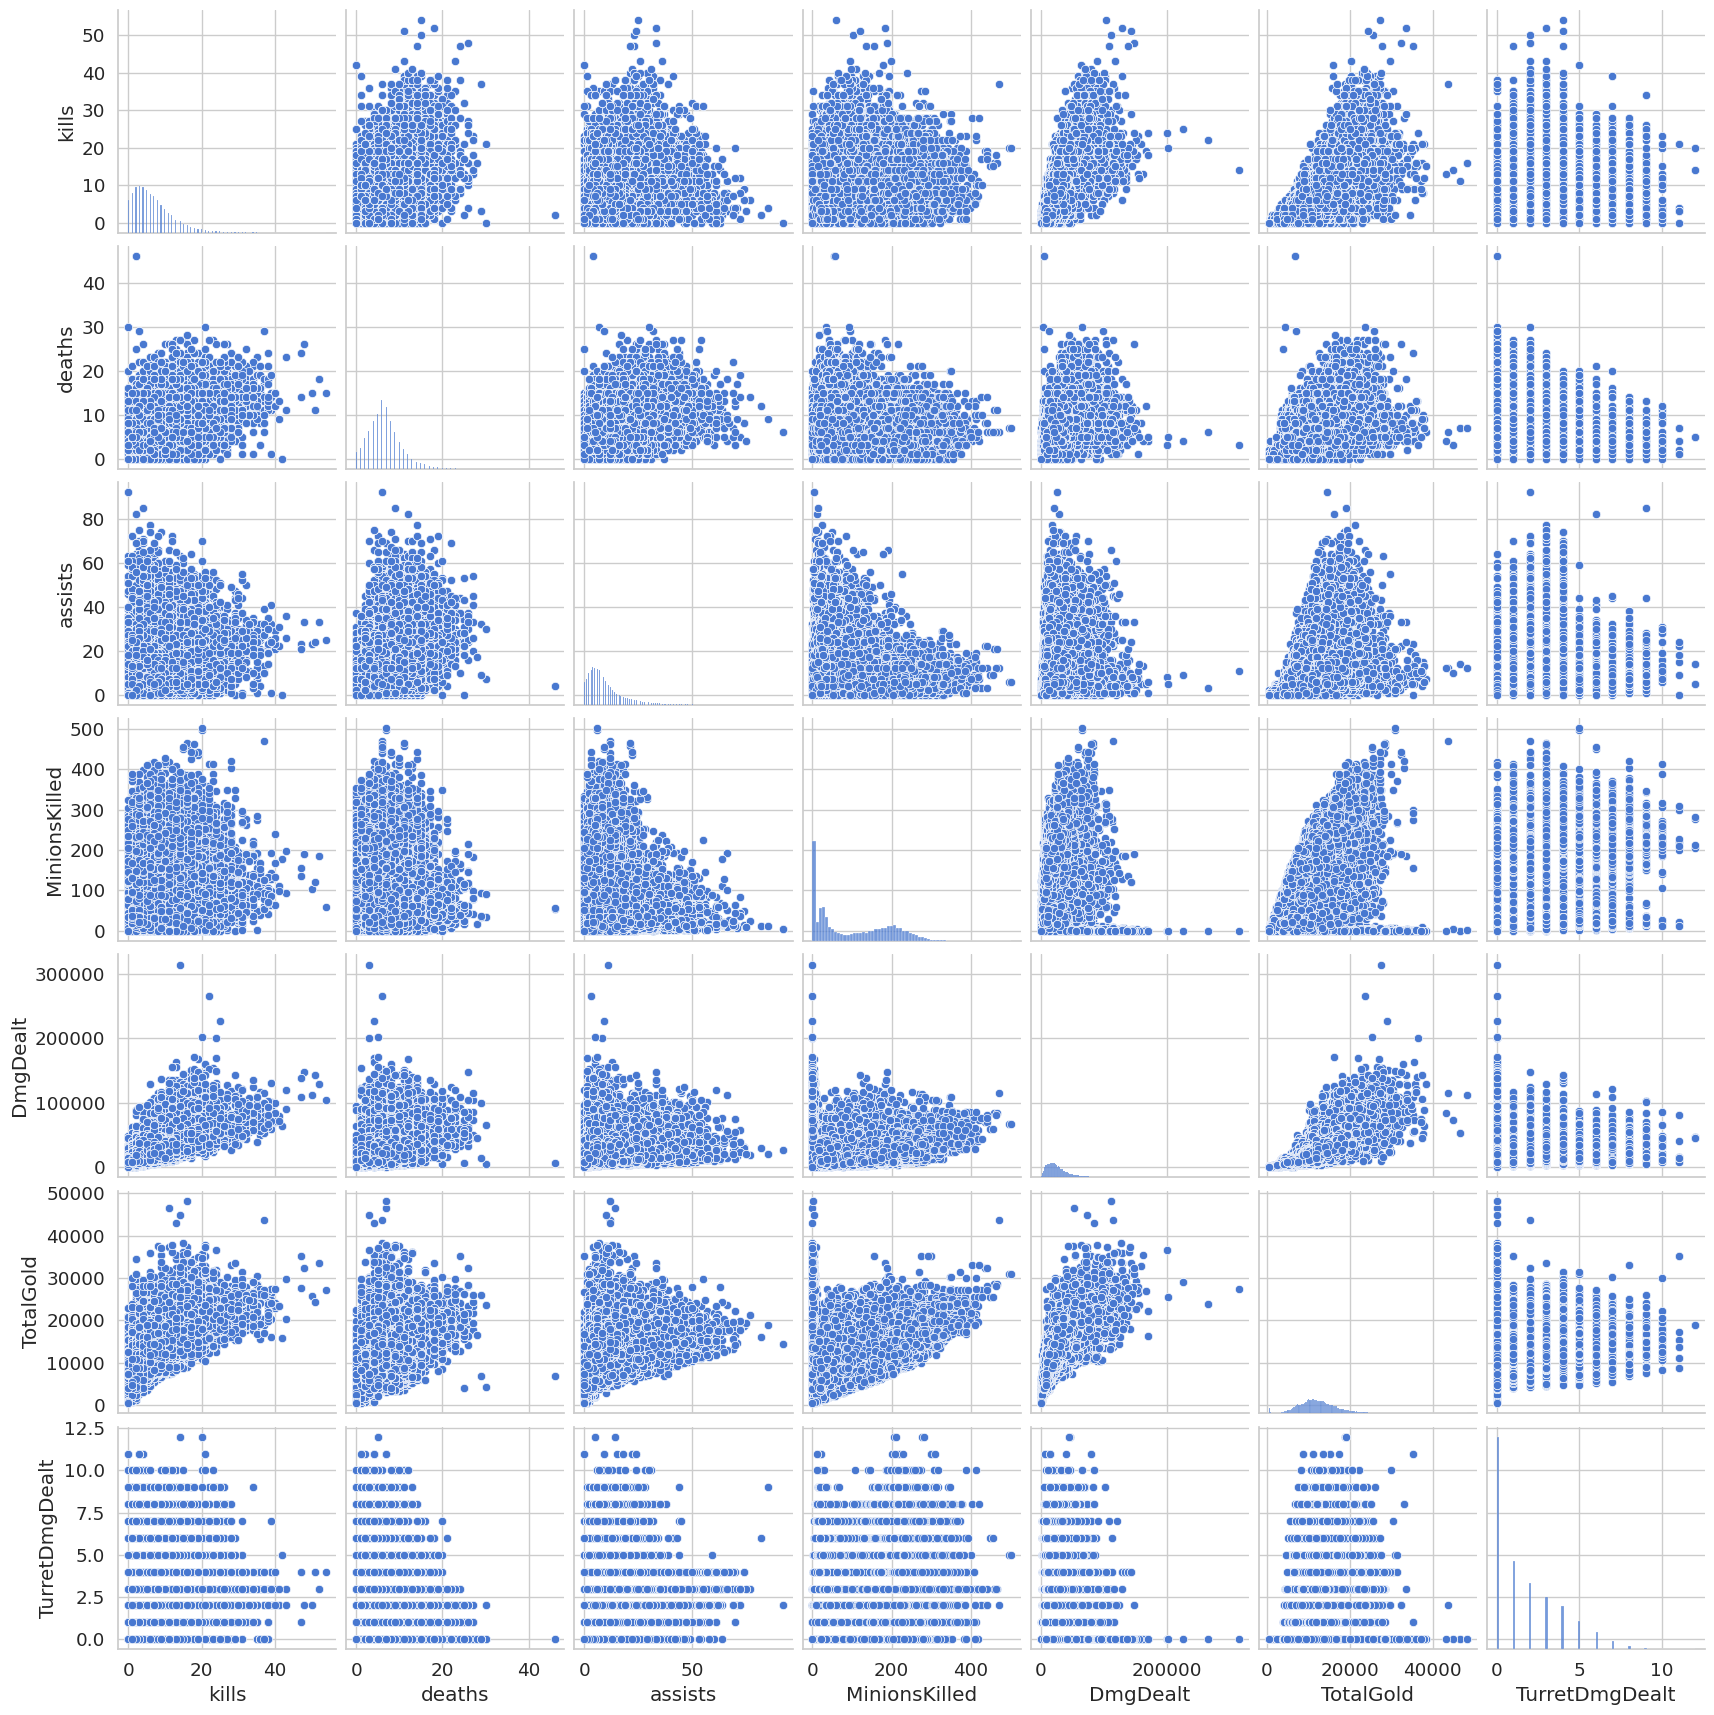

In [36]:

# Plot histograms for a few important metrics
metrics = ['kills', 'deaths', 'assists', 'MinionsKilled', 'DmgDealt', 'TotalGold', 'TurretDmgDealt']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 3, i+1)
    sns.histplot(matchstats_df[metric], kde=True, color='skyblue')
    plt.title(f'Histogram of {metric}')
plt.tight_layout()
plt.show()

# Pie chart style count plot for the categorical variable 'Lane'
plt.figure(figsize=(6, 6))
sns.countplot(x='Lane', data=matchstats_df, palette='pastel')
plt.title('Count of Matches per Lane')
plt.xticks(rotation=45)
plt.show()


# Pair Plot for a selected subset of metrics
sns.pairplot(matchstats_df[metrics])
plt.show()

In [35]:
matchstats_df[metrics].describe()

,kills,deaths,assists,MinionsKilled,DmgDealt,TotalGold,TurretDmgDealt
count,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000
mean,6.831328,6.579702,10.059293,103.865438,26311.801618,12350.632083,1.711893
std,5.502311,3.766482,9.166569,92.905935,18478.868106,4665.560563,1.982145
min,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
25%,3.000000,4.000000,4.000000,18.000000,13601.500000,9299.000000,0.000000
50%,6.000000,6.000000,7.000000,79.000000,22424.000000,11969.000000,1.000000
75%,10.000000,9.000000,13.000000,188.000000,34055.000000,15013.000000,3.000000
max,54.000000,46.000000,92.000000,501.000000,314904.000000,48226.000000,12.000000


<Axes: >

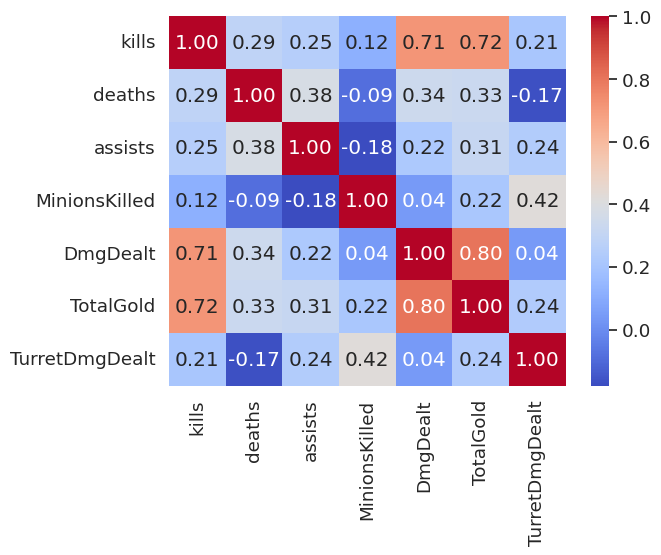

In [37]:
sns.heatmap(matchstats_df[metrics].corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [38]:
df_cor=matchstats_df[['kills', 'deaths', 'assists', 'MinionsKilled', 'DmgDealt', 'TotalGold', 'TurretDmgDealt', 'EnemyChampionFk']]

<Axes: >

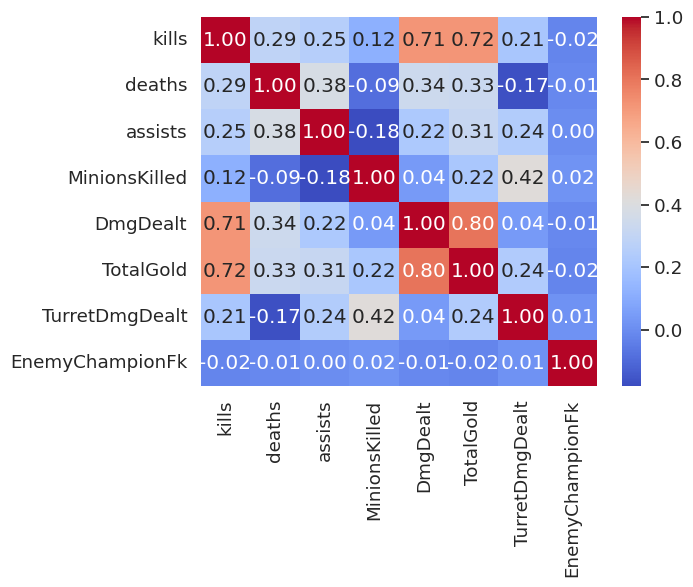

In [39]:
sns.heatmap(df_cor.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Predictive Modeling

In [12]:
# Selecting features for the predictor
# We choose features that are likely to influence the outcome: kills, deaths, assists, minions killed, damage metrics, etc.
features = ['kills', 'deaths', 'assists', 'MinionsKilled', 'DmgDealt', 'DmgTaken', 'TotalGold', 'TurretDmgDealt']

# Ensure that the selected features exist in the dataset (defensive programming)
for feature in features:
    if feature not in matchstats_df.columns:
        raise ValueError(f"Feature {feature} not found in matchstats_df")

X = matchstats_df[features]
y = matchstats_df['Win']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Prediction Accuracy: {accuracy:.4f}')

Logistic Regression Prediction Accuracy: 0.8269


# Evaluation Metrics

In [13]:
from sklearn.metrics import classification_report

The Classification Report summarizes the performance of a classification model. It includes key metrics such as:

**Precision** : Measures the accuracy of positive predictions.

**Recall** : Indicates how many actual positives were correctly identified.

**F1-Score** : Balances precision and recall into a single score.

**Support** : Shows the number of samples for each class.

In [14]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      7651
           1       0.85      0.81      0.83      8122

    accuracy                           0.83     15773
   macro avg       0.83      0.83      0.83     15773
weighted avg       0.83      0.83      0.83     15773



In [15]:
logreg.coef_

array([[ 4.30583372e-02, -3.81082734e-01,  4.58289958e-02,
        -9.68460611e-03,  2.33991549e-05, -4.19912320e-06,
         1.39926306e-04,  8.35560363e-01]])

In [29]:
# Selecting features for the predictor
# We choose features that are likely to influence the outcome: kills, deaths, assists, minions killed, damage metrics, etc.
features = ['kills', 'deaths', 'assists', 'MinionsKilled', 'DmgDealt', 'DmgTaken', 'TotalGold']

# Ensure that the selected features exist in the dataset (defensive programming)
for feature in features:
    if feature not in matchstats_df.columns:
        raise ValueError(f"Feature {feature} not found in matchstats_df")

X = matchstats_df[features]
y = matchstats_df['Win']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Prediction Accuracy: {accuracy:.4f}')

Logistic Regression Prediction Accuracy: 0.7794


In [30]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      7651
           1       0.79      0.78      0.78      8122

    accuracy                           0.78     15773
   macro avg       0.78      0.78      0.78     15773
weighted avg       0.78      0.78      0.78     15773



In [31]:
# Selecting features for the predictor
# We choose features that are likely to influence the outcome: kills, deaths, assists, minions killed, damage metrics, etc.
features = ['kills', 'deaths', 'assists', 'MinionsKilled', 'DmgDealt', 'TotalGold']

# Ensure that the selected features exist in the dataset (defensive programming)
for feature in features:
    if feature not in matchstats_df.columns:
        raise ValueError(f"Feature {feature} not found in matchstats_df")

X = matchstats_df[features]
y = matchstats_df['Win']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Prediction Accuracy: {accuracy:.4f}')

Logistic Regression Prediction Accuracy: 0.7790


In [32]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      7651
           1       0.79      0.78      0.78      8122

    accuracy                           0.78     15773
   macro avg       0.78      0.78      0.78     15773
weighted avg       0.78      0.78      0.78     15773



In [16]:
matchstats_df[features].describe()

,kills,deaths,assists,MinionsKilled,DmgDealt,DmgTaken,TotalGold,TurretDmgDealt
count,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000,78863.000000
mean,6.831328,6.579702,10.059293,103.865438,26311.801618,30430.417623,12350.632083,1.711893
std,5.502311,3.766482,9.166569,92.905935,18478.868106,18542.699251,4665.560563,1.982145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
25%,3.000000,4.000000,4.000000,18.000000,13601.500000,18966.500000,9299.000000,0.000000
50%,6.000000,6.000000,7.000000,79.000000,22424.000000,26852.000000,11969.000000,1.000000
75%,10.000000,9.000000,13.000000,188.000000,34055.000000,37696.000000,15013.000000,3.000000
max,54.000000,46.000000,92.000000,501.000000,314904.000000,435808.000000,48226.000000,12.000000


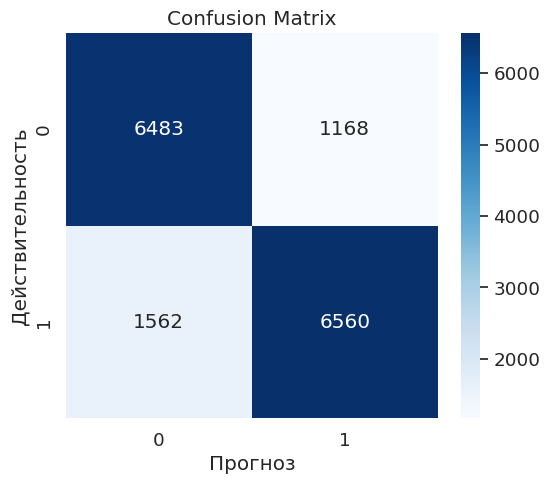

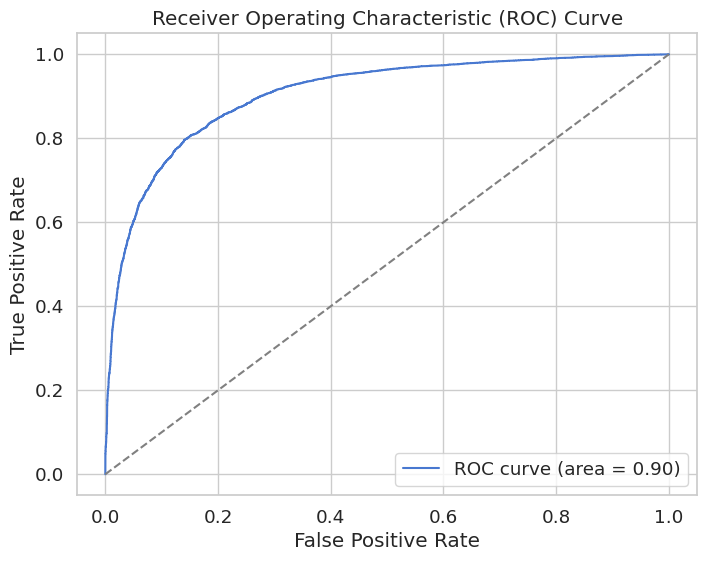

In [17]:
# Confusion Matrix using seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Действительность')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = logreg.predict_proba(X_test)[:, 1]  # probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
# Extract coefficients from log_grid.best_estimator_ model.
log_coeff = pd.Series(logreg.coef_.flatten(),
               index=X_train.columns).sort_values(ascending=False)
log_coeff

,0
TurretDmgDealt,0.835560
assists,0.045829
kills,0.043058
TotalGold,0.000140
DmgDealt,0.000023
DmgTaken,-0.000004
MinionsKilled,-0.009685
deaths,-0.381083


/tmp/ipython-input-512623067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_coeff.values, y=log_coeff.index, palette='Spectral', ax=ax, orient='h')


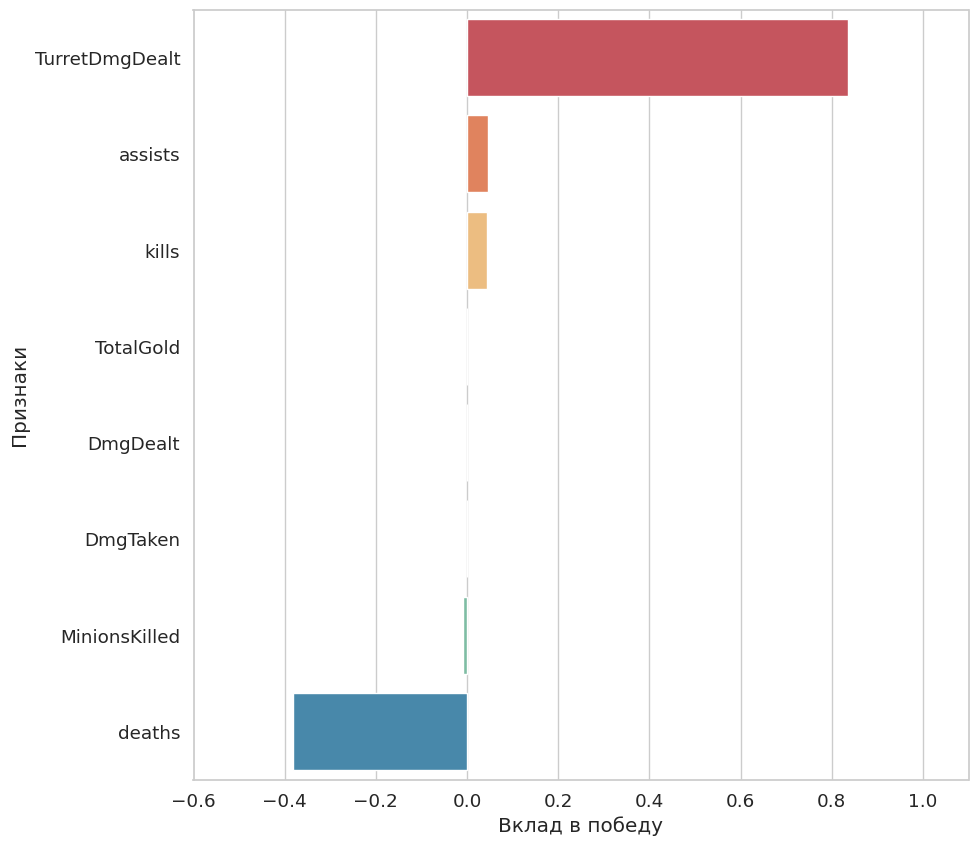

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=log_coeff.values, y=log_coeff.index, palette='Spectral', ax=ax, orient='h')

#ax.set_title('Вклад коэффициентов в регрессионной модели')
ax.set_xlabel('Вклад в победу')
ax.set_ylabel('Признаки')
ax.set_xlim([-.6, 1.1]);

In [20]:
matchstats_df.columns

Index(['MatchStatsId', 'SummonerMatchFk', 'MinionsKilled', 'DmgDealt',
       'DmgTaken', 'TurretDmgDealt', 'TotalGold', 'Lane', 'Win', 'item1',
       'item2', 'item3', 'item4', 'item5', 'item6', 'kills', 'deaths',
       'assists', 'PrimaryKeyStone', 'PrimarySlot1', 'PrimarySlot2',
       'PrimarySlot3', 'SecondarySlot1', 'SecondarySlot2', 'SummonerSpell1',
       'SummonerSpell2', 'CurrentMasteryPoints', 'EnemyChampionFk',
       'DragonKills', 'BaronKills', 'visionScore'],
      dtype='object')

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
lin_res = ols("TotalGold ~ DmgDealt",data=matchstats_df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              TotalGold   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                 1.421e+05
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:17:38   Log-Likelihood:            -7.3751e+05
No. Observations:               78863   AIC:                         1.475e+06
Df Residuals:                   78861   BIC:                         1.475e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7023.3711     17.271    406.664      0.0

In [23]:
lin_res = ols("TotalGold ~ kills",data=matchstats_df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:              TotalGold   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                 8.289e+04
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:17:38   Log-Likelihood:            -7.4981e+05
No. Observations:               78863   AIC:                         1.500e+06
Df Residuals:                   78861   BIC:                         1.500e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8204.0689     18.494    443.618      0.0

In [24]:
lin_res = ols("kills ~ DmgDealt",data=matchstats_df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  kills   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                 8.238e+04
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:17:38   Log-Likelihood:            -2.1817e+05
No. Observations:               78863   AIC:                         4.363e+05
Df Residuals:                   78861   BIC:                         4.364e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2312      0.024     51.639      0.0

In [25]:
from statsmodels.formula.api import logit

In [26]:
matchstats_df.columns

Index(['MatchStatsId', 'SummonerMatchFk', 'MinionsKilled', 'DmgDealt',
       'DmgTaken', 'TurretDmgDealt', 'TotalGold', 'Lane', 'Win', 'item1',
       'item2', 'item3', 'item4', 'item5', 'item6', 'kills', 'deaths',
       'assists', 'PrimaryKeyStone', 'PrimarySlot1', 'PrimarySlot2',
       'PrimarySlot3', 'SecondarySlot1', 'SecondarySlot2', 'SummonerSpell1',
       'SummonerSpell2', 'CurrentMasteryPoints', 'EnemyChampionFk',
       'DragonKills', 'BaronKills', 'visionScore'],
      dtype='object')

In [27]:
lin_res = logit("Win ~ MinionsKilled +TurretDmgDealt +DmgDealt +TotalGold +kills +deaths +assists",data=matchstats_df).fit()
print(lin_res.summary())

Optimization terminated successfully.
         Current function value: 0.403210
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    Win   No. Observations:                78863
Model:                          Logit   Df Residuals:                    78855
Method:                           MLE   Df Model:                            7
Date:                Tue, 04 Nov 2025   Pseudo R-squ.:                  0.4180
Time:                        15:17:39   Log-Likelihood:                -31798.
converged:                       True   LL-Null:                       -54641.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6023      0.031    -19.519      0.000      -0.663      -0.542
MinionsKilled    

In [28]:
lin_res = logit("Win ~ DmgDealt",data=matchstats_df).fit()
print(lin_res.summary())

Optimization terminated successfully.
         Current function value: 0.665636
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    Win   No. Observations:                78863
Model:                          Logit   Df Residuals:                    78861
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Nov 2025   Pseudo R-squ.:                 0.03929
Time:                        15:17:39   Log-Likelihood:                -52494.
converged:                       True   LL-Null:                       -54641.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6725      0.014    -49.270      0.000      -0.699      -0.646
DmgDealt    2.805e-05   4.64e